# Food Market Research

This is a study project dedicated to `How to Tell a Story Using Data` theme from `Yandex.Practicum Data Analysis` course.

**Key words**: pie chart, bar plot, scatter plot, distribution plot.

**Libraries used**: pandas, matplotlib, numpy, plotly, seaborn.

## Table of contents

- [Project's goal](#goal)
- [General information](#general)
- [Data analysis](#da)
- [Conclusion](#conclusion)
- [Presentaion](#presentation)


## Project's goal<a id='goal'></a>
Our clients decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so there is a need to attract investors. They’re interested in the current market conditions, but they need an answer: will the new restaurant be able to maintain success when the novelty of robot waiters wears off?

We are going to prepare a market research to understand whether new restaurant will be able to maintain success. 

### We have the following data:
- open-source data on restaurants in LA.

### We are going to:
- preprocess data, 
- analyze restaurants market, 
- formulate recommendations,
- prepare presentation

## General information<a id='general'></a>
We will:
- Download the data on restaurants in LA. 
- Make sure that the data type for each column is correct and that there are no missing values or duplicates. 
- Process them if necessary.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly

from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# function to get basic info about the dataset
def get_info(df):

    print("Head:")
    display(df.head())
    print()
    
    print("Info:")
    display(df.info())
    print()
    
    print("Description of quantitative parameters:")
    display(df.describe())
    print()
    
    print("Description of categorical parameters:")
    display(df.describe(include='object'))
    print()
    
    print("Columns with NaN values:")
    display(df.isna().sum())
    print()
    
    print("Shape:")
    display(df.shape)
    print()
    
    print("Number of duplicated rows:")
    display(df.duplicated().sum())        

In [3]:
from io import BytesIO
import requests
spreadsheet_id = '1558RB8TtPKbJvISZsfpGWPdgfN2uiZg7iJWh2_8BsR0'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
rest = pd.read_csv(BytesIO(r.content))
get_info(rest)

Head:


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


None


Description of quantitative parameters:


,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000



Description of categorical parameters:


,object_name,address,chain,object_type
count,9651,9651,9648,9651
unique,8672,8517,2,6
top,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,False,Restaurant
freq,47,11,5972,7255



Columns with NaN values:


id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64


Shape:


(9651, 6)


Number of duplicated rows:


0

#### Data description:

- `object_name` — establishment name
- `chain` — chain establishment (TRUE/FALSE)
- `object_type` — establishment type
- `address` — address
- `number` — number of seats

#### There are only 3 rows with NA values, let's drop them:

In [4]:
rest.dropna().head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


#### Let's change data types and save some memory usage:

In [5]:
rest['chain'] = rest['chain'].astype('bool')
rest['object_type'] = rest['object_type'].astype('category')

In [6]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9651 non-null   bool    
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: bool(1), category(1), int64(2), object(2)
memory usage: 320.8+ KB


#### Let's check whether there are any hidden duplicates in object types:

In [7]:
rest['object_type'].value_counts()

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

In [8]:
rest.loc[rest['number'] == 1].count()

id             187
object_name    187
address        187
chain          187
object_type    187
number         187
dtype: int64

#### There are 187 restaurants with 1 one seat. We'll keep this data for now, as it is possible that those are tiny restaurants. But we will clarify this with those who provided the data. 

## Data Analysis<a id='da'></a>

In [9]:
# setting graph style
sns.set_palette('deep')
sns.set_style('whitegrid')

### Investigate the proportions of the various types of establishments. Plot a graph.

In [10]:
rest_types_chain = rest.pivot_table(index=['object_type', 'chain'], values='object_name', aggfunc='count')
rest_types_chain.columns=['count']
rest_types_chain = rest_types_chain.sort_values(by='count',ascending=False)
rest_types_chain=rest_types_chain.reset_index()

In [11]:
rest_types=rest_types_chain.pivot_table(index=['object_type'], values='count', aggfunc='sum')
rest_types=rest_types.reset_index()
rest_types = rest_types.sort_values('count', ascending=False)

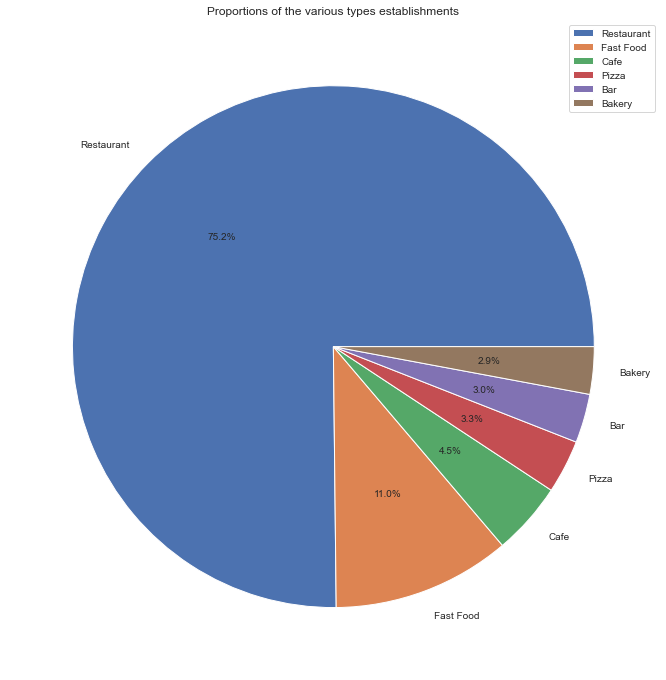

In [12]:
plt.figure(figsize=(12,12))
fig = plt.pie(x=rest_types['count'], labels=rest_types['object_type'], autopct='%1.1f%%',startangle=0)
plt.legend()
plt.title('Proportions of the various types establishments')
plt.show() 

Restaurant is an unconditional winner.

### Investigate the proportions of chain and nonchain establishments. Plot a graph.


In [13]:
rest_chain = rest.groupby('chain').agg({'object_type':'count'})
rest_chain.columns=['count']
rest_chain = rest_chain.sort_values(by='count',ascending=False)
rest_chain=rest_chain.reset_index()
rest_chain

,chain,count
0,False,5972
1,True,3679


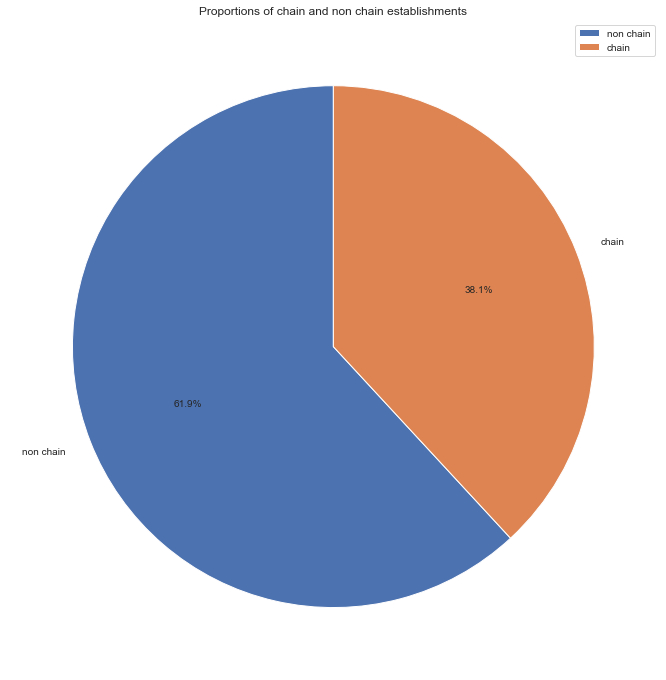

In [14]:
plt.figure(figsize=(12,12))
fig = plt.pie(x=rest_chain['count'], labels=['non chain', 'chain'], autopct='%1.1f%%',startangle=90)
plt.legend()
plt.title('Proportions of chain and non chain establishments')
plt.show() 

Almost 60% of establishments do not belong to a chain.

### Which type of establishment is typically a chain?


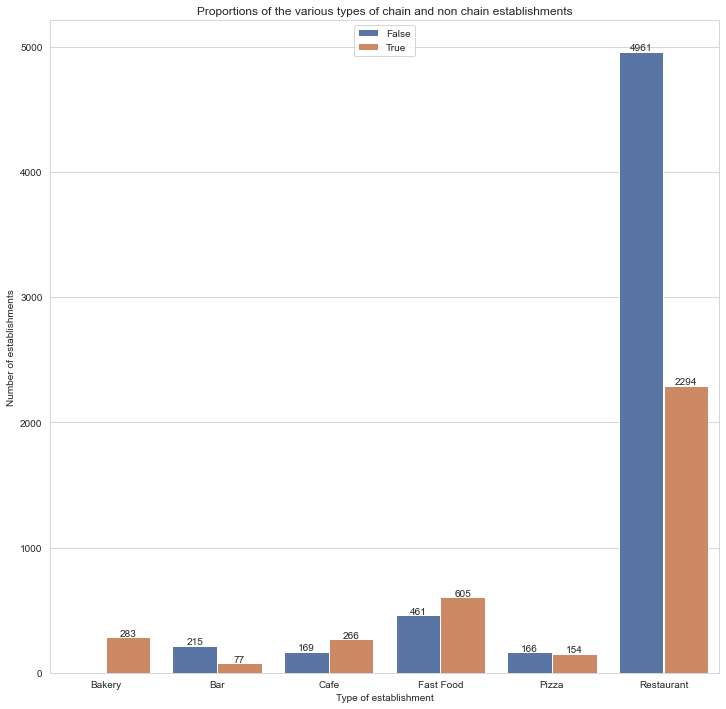

In [15]:
plt.figure(figsize=(12,12))
fig = sns.barplot(y=rest_types_chain['count'], x=rest_types_chain['object_type'], hue=rest_types_chain['chain'])
plt.legend()
plt.title('Proportions of the various types of chain and non chain establishments')
plt.xlabel('Type of establishment')
plt.ylabel('Number of establishments')

for p in fig.patches:
    if float(p.get_height()) > 0:
        height = p.get_height()
        fig.text(x = p.get_x()+(p.get_width()/2), 
     y = height+10, 
     s = '{:.0f}'.format(height), 
     ha ='center') 
    
plt.show()

There are 2 times more non chain restaurants than chain restaurants.

### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

In [16]:
rest_chains = rest.query('chain == True')

In [17]:
dict = rest_chains['object_name'].value_counts().to_dict()

In [18]:
def mapper(row):
    return dict.get(row['object_name'])
 
rest_chains['chain_size'] = rest_chains.apply(mapper, axis=1)

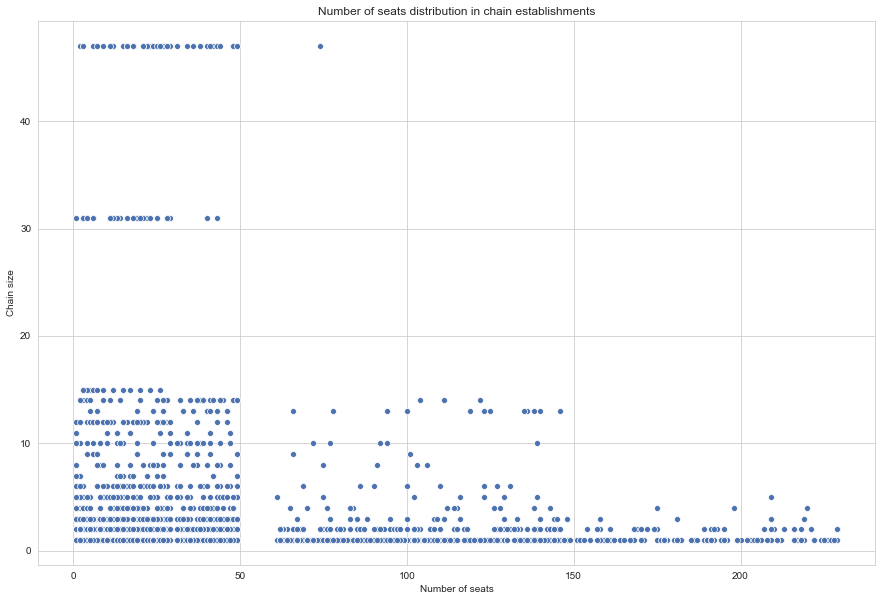

In [19]:
size = (15, 10)
fig, ax = plt.subplots(figsize=size)
fig = sns.scatterplot(x=rest_chains['number'], y=rest_chains['chain_size'])
plt.title('Number of seats distribution in chain establishments')
plt.xlabel('Number of seats')
plt.ylabel('Chain size')
plt.show()

Chains (group of establishments) are characterized by few establishments with a small number of seats.

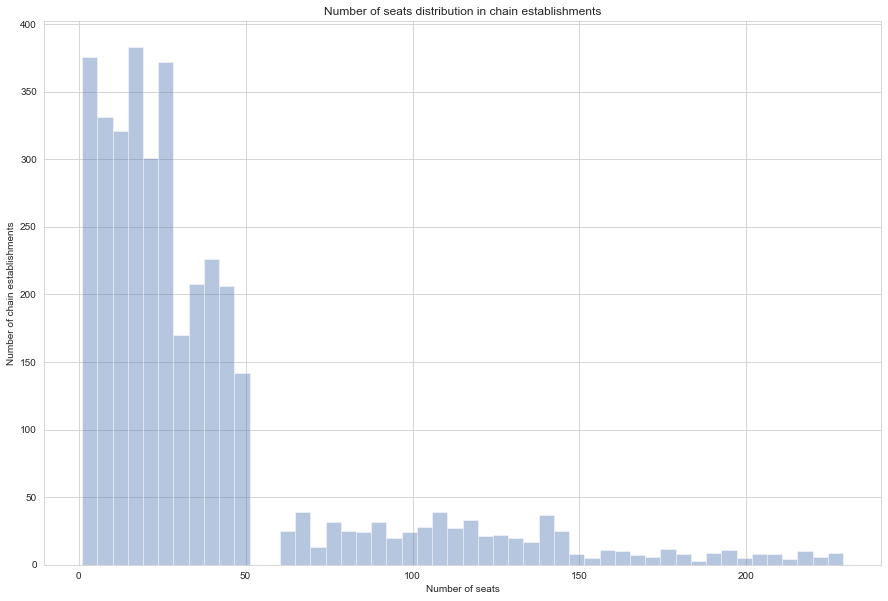

In [20]:
fig, ax = plt.subplots(figsize=size)
fig = sns.distplot(rest_chains['number'], kde=False)
plt.title('Number of seats distribution in chain establishments')
plt.xlabel('Number of seats')
plt.ylabel('Number of chain establishments')
plt.show()

Overall, most establishments, which belong to a chain, have small number of seats.

### Determine the average number of seats for each type of establishment. On average, which type of establishment has the greatest number of seats? Plot graphs.

In [21]:
seats_avg=rest.groupby('object_type')['number'].agg(number='mean').sort_values(by='number', ascending=False)
seats_avg=seats_avg.reset_index().sort_values(by='number', ascending=False)
seats_avg

,object_type,number
0,Restaurant,48.042316
1,Bar,44.767123
2,Fast Food,31.837711
3,Pizza,28.459375
4,Cafe,25.000000
5,Bakery,21.773852


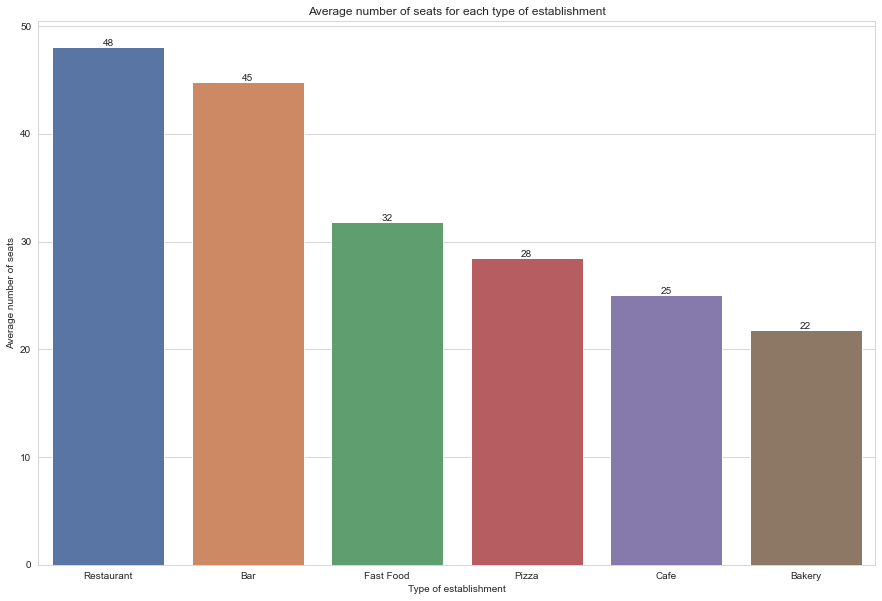

In [22]:
plt.figure(figsize=size)

fig = sns.barplot(x='object_type', y='number', data=seats_avg, order=['Restaurant', 'Bar', 'Fast Food','Pizza','Cafe','Bakery'])
plt.title('Average number of seats for each type of establishment')
plt.xlabel('Type of establishment')
plt.ylabel('Average number of seats')

for p in fig.patches:
    height = p.get_height()
    fig.text(x = p.get_x()+(p.get_width()/2), 
 y = height+0.1, 
 s = '{:.0f}'.format(height), 
 ha ='center') 
    
plt.show()

On average restaurants and bars have the greatest number of seats.

### Put the data on street names from the address column in a separate column.

In [23]:
def street_name(address):
 
    clean_address = []
    for word in address.split()[1:]:
        if word == "#" or word[0] == "#":
            break
        clean_address.append(word)
        if word in ("BLVD", "ST", "AVE", "DR", "RD", "STE") :
            break
 
    return " ".join(clean_address)

rest['street'] = rest['address'].apply(street_name)

In [24]:
rest['street'].isna().sum()

0

In [25]:
rest.head()

,id,object_name,address,chain,object_type,number,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


### Plot a graph of the top ten streets by number of restaurants.


In [26]:
top_streets = rest.pivot_table(index='street', values = 'number', aggfunc={'count', 'sum'}).sort_values('count', ascending=False)
top_streets= top_streets.reset_index()
top_streets.columns=['street', 'establishments_amount', 'seats_amount']
top_10 = top_streets.head(10)

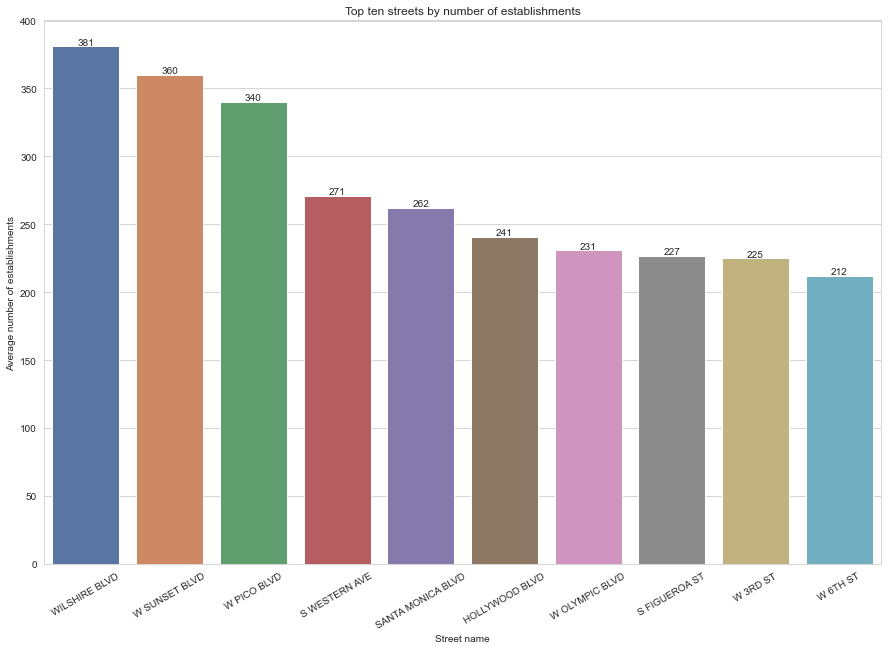

In [27]:
plt.figure(figsize=size)

fig = sns.barplot(x='street', y='establishments_amount', data=top_streets.head(10))
plt.title('Top ten streets by number of establishments')
plt.xlabel('Street name')
plt.ylabel('Average number of establishments')
plt.xticks(rotation=30)

for p in fig.patches:
    height = p.get_height()
    fig.text(x = p.get_x()+(p.get_width()/2), 
 y = height+1, 
 s = '{:.0f}'.format(height), 
 ha ='center') 
    
plt.show()

Streets, most packed with restaurants are: "Wilshire Blvd", "W Sunset Blvd" and "W Pico Blvd"

### Find the number of streets that only have one restaurant.


In [28]:
print('Number of streets that only have one restaurant:', top_streets.loc[top_streets['establishments_amount'] == 1, 'street'].count())

Number of streets that only have one restaurant: 434


### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?


In [29]:
popular_streets = pd.Series(top_10['street'].unique())

In [30]:
popular_streets_seats = rest.query('street in @popular_streets').pivot_table(index=['street', 'object_name'])
popular_streets_seats.reset_index()

popular_streets_seats_chain = popular_streets_seats.query('chain==True')
popular_streets_seats_chain=popular_streets_seats_chain.drop(['chain','id'], axis=1)

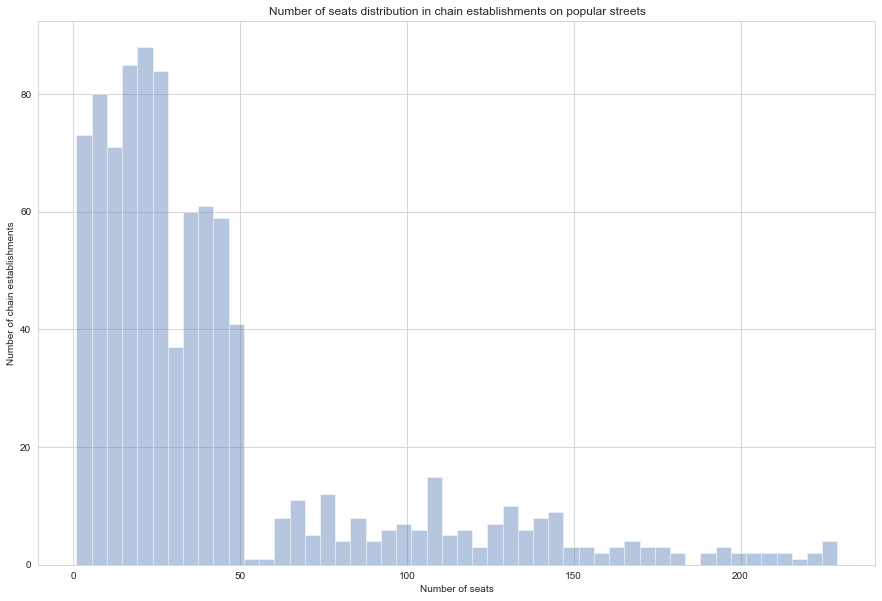

In [31]:
fig, ax = plt.subplots(figsize=size)
chart = sns.distplot(popular_streets_seats_chain['number'], bins=50, kde=False)
plt.title('Number of seats distribution in chain establishments on popular streets')
plt.xlabel('Number of seats')
plt.ylabel('Number of chain establishments')
plt.show()

In [32]:
popular_streets_seats_chain['number'].describe()

count    924.000000
mean      43.350902
std       45.530717
min        1.000000
25%       15.000000
50%       27.500000
75%       46.000000
max      229.000000
Name: number, dtype: float64

In [33]:
print('The most frequent number of seats:' ,int(popular_streets_seats_chain['number'].mode()))

The most frequent number of seats: 21


We can notice that most of the establishments have less than 50 seats. As the distribution is not even, we have calculated mode, which is 21 seat.

## Conclusion<a id='conclusion'></a>


### Draw an overall conclusion and provide recommendations on restaurant type and number of seats. Comment on the possibility of developing a chain.

After the analysis of the current food market conditions in LA, we are ready to provide these recommendations:
1. We would advise to open a restaurant.
2. Preferable size would be around 20-30 seats.
3. Suitable location would be one of the most popular streets.

Popular streets have high passability, so there are lots of people with a goal of eating out. Familiar size and type of the establishment will attract customers, who would seek something habitual yet new. People will be allured by the distinctive feature of the restaurant: robot-waiters.

Most of the restaurants are non chain, so we would require more information on the existing market as well as data on the performance of the new restaurant, to make comments on the possibility of developing a chain.


## Presentation<a id='presentation'></a>


[Link to Presentation](https://drive.google.com/file/d/1ry1uhHKyqIBf3IGx5ZIF7DZlK-ChGVku/view?usp=sharing)